import numpy as np: Здесь импортируется библиотека NumPy под псевдонимом "np". NumPy предоставляет мощные инструменты для работы с массивами и матрицами в Python.

from sklearn import svm: Здесь импортируется модуль "svm" из библиотеки scikit-learn (sklearn), который предоставляет реализацию метода машинного обучения Support Vector Machine (SVM).

In [1]:
# Connecting the necessary libraries
import numpy as np
from sklearn import svm

np.random.seed(0): Устанавливает генератор случайных чисел NumPy в определенное начальное состояние, чтобы обеспечить воспроизводимость результатов.

X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]: Создает два набора случайных данных, каждый содержащий 20 точек в двумерном пространстве. Первый набор сдвигается на [-2, -2], а второй набор сдвигается на [2, 2]. Оба набора данных объединяются в один массив "X".

Y = [0] * 20 + [1] * 20: Создает массив "Y", который содержит 20 нулей и 20 единиц. Этот массив будет использоваться для определения классов данных.

In [123]:
# Creating a data set
np.random.seed (0)
X = np.r_[np.random.randn(20, 2) - [2, 2],
np.random.randn (20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

clf = svm.SVC(kernel='linear'): Создает экземпляр модели Support Vector Machine (SVM) с линейным ядром (kernel='linear') и сохраняет его в переменной "clf".

clf.fit(X, Y): Обучает модель SVM на данных "X" с соответствующими метками классов "Y".

In [4]:
# Fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

SVC(kernel='linear')

w = clf.coef_[0]: Извлекает коэффициенты гиперплоскости из обученной модели SVM.

a = -w[0] / w[1]: Вычисляет угол наклона гиперплоскости.

xx = np.linspace(-5, 5): Создает массив "xx", содержащий равномерно распределенные значения от -5 до 5.

yy = a * xx - (clf.intercept_[0]) / w[1]: Вычисляет координаты точек на гиперплоскости, которая разделяет классы.

In [33]:
# Draw the separating hypoplane
w = clf.coef_ [0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5, 10)
yy = a * xx - (clf.intercept_ [0]) / w[1]
yy, xx

(array([ 7.32169617,  5.77505119,  4.22840622,  2.68176125,  1.13511627,
        -0.4115287 , -1.95817367, -3.50481865, -5.05146362, -6.59810859]),
 array([-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
         0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ]))

b = clf.support_vectors_[0]: Извлекает первый опорный вектор из обученной модели SVM.

yy_down = a * xx + (b[1] - a * b[0]): Вычисляет координаты линии, проходящей через опорный вектор и находящейся под гиперплоскостью.

b = clf.support_vectors_[-1]: Извлекает последний опорный вектор из обученной модели SVM.

yy_up = a * xx + (b[1] - a * b[0]): Вычисляет координаты линии, проходящей через опорный вектор и находящейся над гиперплоскостью.

In [34]:
# Construct lines through the reference vectors
b = clf.support_vectors_ [0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_ [-1]
yy_up = a * xx + (b[1] - a * b[0])
yy_down, yy_up

(array([ 5.77921879,  4.23257382,  2.68592885,  1.13928387, -0.4073611 ,
        -1.95400607, -3.50065105, -5.04729602, -6.593941  , -8.14058597]),
 array([ 8.86428014,  7.31763517,  5.77099019,  4.22434522,  2.67770025,
         1.13105527, -0.4155897 , -1.96223467, -3.50887965, -5.05552462]))

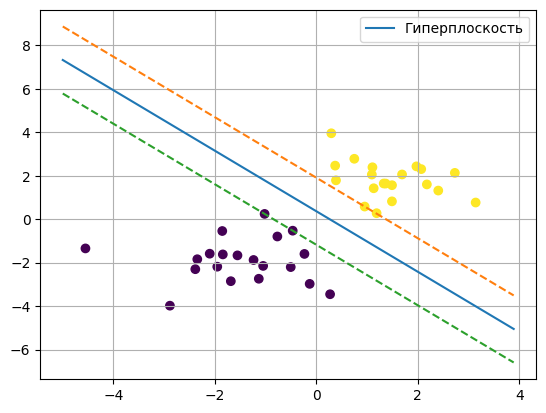

In [46]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c=Y)
plt.plot(xx[:-1], yy[:-1], label = "Гиперплоскость")
plt.plot(xx[:-1], yy_up[:-1], '--')
plt.plot(xx[:-1], yy_down[:-1], '--')
plt.grid()
plt.legend()
plt.show()

------------------------------------------------------------------------
Теперь рассмотрим случаи, когда классы расположены по кругу и так просто с помощью прямой не получится их разбить. Рассмотрим какие трюки с ядрами нужно сделать в таких случаях

from sklearn.datasets import make_circles: Импортирует функцию "make_circles" из модуля "datasets" библиотеки scikit-learn. Эта функция используется для генерации данных в форме двух пересекающихся окружностей.

X1, y1 = make_circles(n_samples=500, noise=0.06, random_state=42): Создает данные, состоящие из двух переменных. "X1" будет содержать сгенерированные точки данных, а "y1" будет содержать соответствующие метки классов. В данной строке выполняются следующие действия:

n_samples=500: Генерирует 500 точек данных.
noise=0.06: Добавляет шум к данным для усложнения задачи классификации.
random_state=42: Задает начальное состояние генератора случайных чисел для воспроизводимости результатов.

from sklearn.datasets import make_gaussian_quantiles: Импортирует функцию "make_gaussian_quantiles" из модуля "datasets" библиотеки scikit-learn. Эта функция используется для генерации данных в форме двух классов с гауссовыми распределениями.

X2, y2 = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=1000, mean=(2, 3)): Создает данные, аналогично предыдущей строке, но с другими параметрами:

n_features=2: Задает количество признаков (в данном случае, два признака).
n_classes=2: Задает количество классов (в данном случае, два класса).
n_samples=1000: Генерирует 1000 точек данных.
mean=(2, 3): Задает средние значения для гауссовых распределений.

In [48]:
from sklearn.datasets import make_circles
X1 , y1 = make_circles(n_samples =500, noise =0.06, random_state =42)
from sklearn.datasets import make_gaussian_quantiles
X2 , y2 = make_gaussian_quantiles(n_features =2, n_classes=2,
n_samples =1000 , mean =(2 ,3))

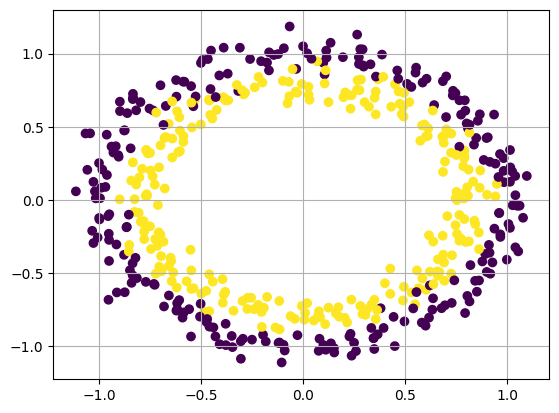

In [49]:
plt.scatter(X1[:, 0], X1[:,1], c=y1)
plt.grid()
plt.show()

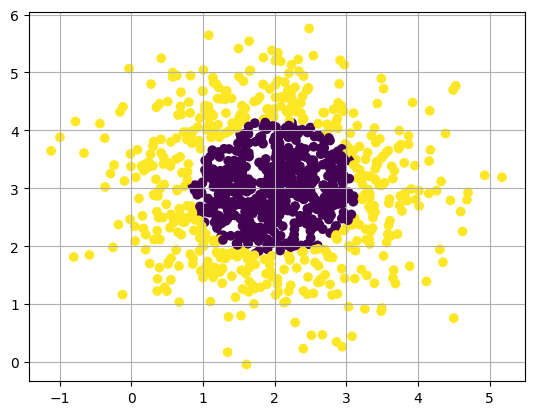

In [50]:
plt.scatter(X2[:, 0], X2[:,1], c=y2)
plt.grid()
plt.show()

from sklearn import svm: Импортирует модуль "svm" из библиотеки scikit-learn, который предоставляет реализации методов машинного обучения Support Vector Machine (SVM).

linear_svc = svm.SVC(kernel='linear').fit(X, y): Создает модель Support Vector Machine (SVM) с линейным ядром (kernel='linear') и обучает ее на данных "X" и "y"

In [57]:
from sklearn import svm
from sklearn.metrics import accuracy_score
linear_svc_1 = svm.SVC(kernel='linear').fit(X1, y1)
linear_svc_2 = svm.SVC(kernel='linear').fit(X2, y2)
print(f'Accuracy={accuracy_score(y1, linear_svc_1.predict(X1))}')
print(f'Accuracy={accuracy_score(y2, linear_svc_2.predict(X2))}')

Accuracy=0.496
Accuracy=0.623


rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=1).fit(X, y): Создает модель SVM с радиально-базисной функцией (RBF) в качестве ядра (kernel='rbf'). Параметр gamma устанавливает ширину RBF-ядра, а C устанавливает параметр регуляризации. Модель обучается на данных X и метках классов y и результат сохраняется в переменной rbf_svc.

In [58]:
rbf_svc_1 = svm.SVC(kernel='rbf', gamma =0.7, C=1).fit(X1, y1)
rbf_svc_2 = svm.SVC(kernel='rbf', gamma =0.7, C=1).fit(X2, y2)
print(f'Accuracy={accuracy_score(y1, rbf_svc_1.predict(X1))}')
print(f'Accuracy={accuracy_score(y2, rbf_svc_2.predict(X2))}')

Accuracy=0.93
Accuracy=0.99


poly_svc = svm.SVC(kernel='poly', degree=2, C=1).fit(X, y): Создает модель SVM с полиномиальным ядром (kernel='poly') степени 2. Параметр degree задает степень полинома, а C устанавливает параметр регуляризации. Модель обучается на данных X и метках классов y, и результат сохраняется в переменной poly_svc.

In [61]:
poly_svc_1 = svm.SVC(kernel='poly', degree=2, C=1). fit(X1, y1)
poly_svc_2 = svm.SVC(kernel='poly', degree=2, C=1). fit(X2, y2)
print(f'Accuracy={accuracy_score(y1, poly_svc_1.predict(X1))}')
print(f'Accuracy={accuracy_score(y2, poly_svc_2.predict(X2))}')

Accuracy=0.942
Accuracy=0.773


sig_svc_1 = svm.SVC(kernel='sigmoid').fit(X1, y1): Создает и обучает модель SVM с сигмоидной функцией в качестве ядра на данных X1 и метках классов y1. Модель сохраняется в переменной sig_svc_1.

In [64]:
sig_svc_1 = svm.SVC(kernel='sigmoid'). fit(X1, y1)
sig_svc_2 = svm.SVC(kernel='sigmoid'). fit(X2, y2)
print(f'Accuracy={accuracy_score(y1, sig_svc_1.predict(X1))}')
print(f'Accuracy={accuracy_score(y2, sig_svc_2.predict(X2))}')

Accuracy=0.508
Accuracy=0.433


Линейное ядро для построения гиперплоскости плохо работает, т.к. невозможно провести прямую, которая разделяла бы 2 группы четко. Приходится переносить данные в большие измерения. Это сжирает больше ресурсов и точность предсказанных данных из-за этого падает. Поэтому в таких случаях лучше использовать Гауссова или полиномиальное ядро

------------------------------------------------------------------------
Мультиклассовый SVM. Один против остальных
* Пробуем применить бинарную классификацию SVM, когда число возможных классов больше двух: Y = {𝑦1, … , 𝑦𝑝}, 𝑝 > 2.
* Разобьем задачу на бинарные классификаторы по схеме «один против остальных» (One-vs-Rest).
* Построим 𝑝 бинарных классификаторов SVM.

from sklearn.svm import SVC: Импортирует класс SVC (Support Vector Classification) из модуля svm библиотеки scikit-learn. Этот класс используется для создания моделей машины опорных векторов (SVM) для задачи классификации.

from sklearn.multiclass import OneVsRestClassifier: Импортирует класс OneVsRestClassifier из модуля multiclass библиотеки scikit-learn. Этот класс используется для реализации стратегии "One-vs-Rest" (один против всех) при многоклассовой классификации.

from sklearn import datasets: Импортирует модуль datasets библиотеки scikit-learn, который содержит наборы данных, включая стандартные наборы данных для практики.

from sklearn.model_selection import train_test_split: Импортирует функцию train_test_split из модуля model_selection библиотеки scikit-learn. Эта функция используется для разделения данных на тренировочную и тестовую выборки.

from sklearn.preprocessing import StandardScaler: Импортирует класс StandardScaler из модуля preprocessing библиотеки scikit-learn. Этот класс используется для стандартизации признаков (Feature Scaling).

In [65]:
# Connecting the necessary libraries
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris(): Загружает стандартный набор данных "Ирисы Фишера" с помощью функции load_iris() из модуля datasets. Данные об ирисах загружаются и сохраняются в переменной iris.

X = iris.data; y = iris.target: Извлекает признаки (X) и метки классов (y) из загруженных данных и сохраняет их в переменных X и y соответственно.

In [67]:
# Creating a data set
iris = datasets.load_iris ()
X = iris.data; y = iris.target

X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y): Разделяет данные X и метки классов y на тренировочную и тестовую выборки. Параметры test_size устанавливают долю тестовой выборки, random_state задает начальное состояние генератора случайных чисел для воспроизводимости, а stratify используется для обеспечения стратификации данных при разделении.

In [68]:
# Create train and test split
X_tr , X_t , y_tr , y_t = train_test_split(X, y, test_size =0.3,
random_state =42, stratify=y)

sc = StandardScaler().fit(X_tr): Создает экземпляр класса StandardScaler и применяет его метод .fit() к тренировочным данным X_tr для подгонки (обучения) стандартизатора к данным.

X_tr_std = sc.transform(X_tr); X_t_std = sc.transform(X_t): Стандартизирует тренировочные (X_tr) и тестовые (X_t) данные с помощью стандартизатора, который был обучен на тренировочных данных. Стандартизированные данные сохраняются в переменных X_tr_std и X_t_std.

In [87]:
# Feature Scaling using StandardScaler
sc = StandardScaler (). fit(X_tr)
X_tr_std = sc.transform(X_tr); X_t_std = sc.transform(X_t)

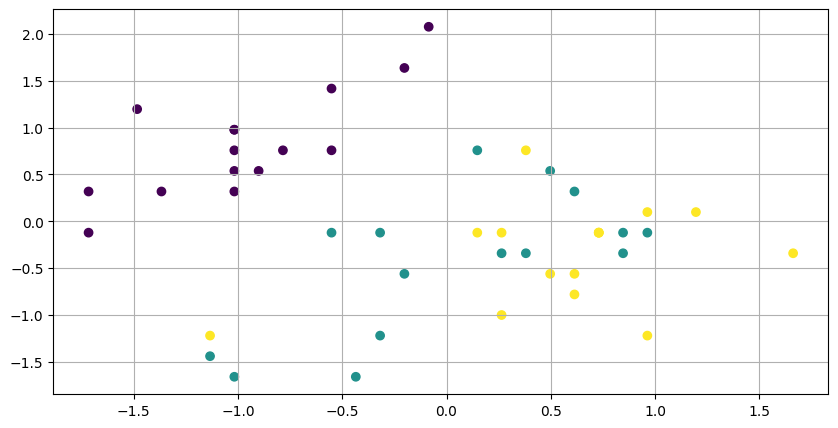

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(X_t_std[:, 0], X_t_std[:,1], c=y_t)
plt.grid()
plt.show()

model = SVC(): Создает экземпляр класса SVC, представляющий модель Support Vector Classification (SVM) с параметрами по умолчанию.

In [102]:
# Fit the model
model = SVC()

ovr = OneVsRestClassifier(model).fit(X_tr_std, y_tr): Создает экземпляр класса OneVsRestClassifier, который оборачивает модель SVC и использует стратегию "One-vs-Rest". Затем этот композитный класс обучается на стандартизированных тренировочных данных X_tr_std и соответствующих метках классов y_tr. Результат сохраняется в переменной ovr.

In [103]:
# define strategy and fit model
ovr = OneVsRestClassifier(model).fit(X_tr_std , y_tr)

y_ovr = ovr.predict(X_t_std): Использует обученную модель ovr, чтобы сделать предсказания на стандартизированных тестовых данных X_t_std. Предсказанные метки классов сохраняются в переменной y_ovr.

In [104]:
# make predictions
y_ovr = ovr.predict(X_t_std );

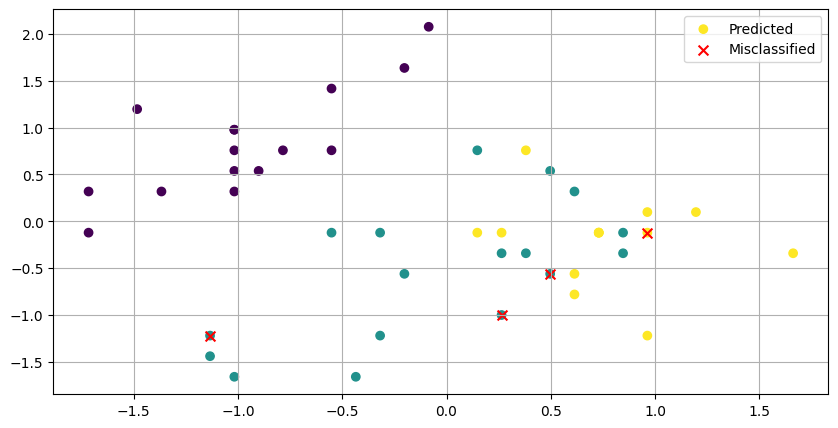

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(X_t_std[:, 0], X_t_std[:,1], c=y_ovr, cmap='viridis', marker='o', label='Predicted')
misclassified_indices = y_t != y_ovr
plt.scatter(X_t_std[misclassified_indices, 0], X_t_std[misclassified_indices, 1], c='red', marker='x', s=50, label='Misclassified')
plt.grid()
plt.legend()
plt.show()

In [113]:
print(f'Accuracy={accuracy_score(y_t, y_ovr)}')

Accuracy=0.9111111111111111


*********************
Далее представлен тот же код, но уже работающий по принципу каждый против каждого.


In [119]:
# Connecting the necessary libraries
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Creating a data set
iris = datasets.load_iris ()
X = iris.data; y = iris.target
# Create train and test split
X_tr , X_t , y_tr , y_t = train_test_split(X, y, test_size =0.3,
random_state =42, stratify=y)
# Feature Scaling using StandardScaler
sc = StandardScaler (). fit(X_tr)
X_tr_std = sc.transform(X_tr); X_t_std = sc.transform(X_t)
# define strategy and fit model
ovo = OneVsOneClassifier(SVC ()). fit(X_tr_std , y_tr)
# make predictions
y_ovo = ovo.predict(X_t_std)

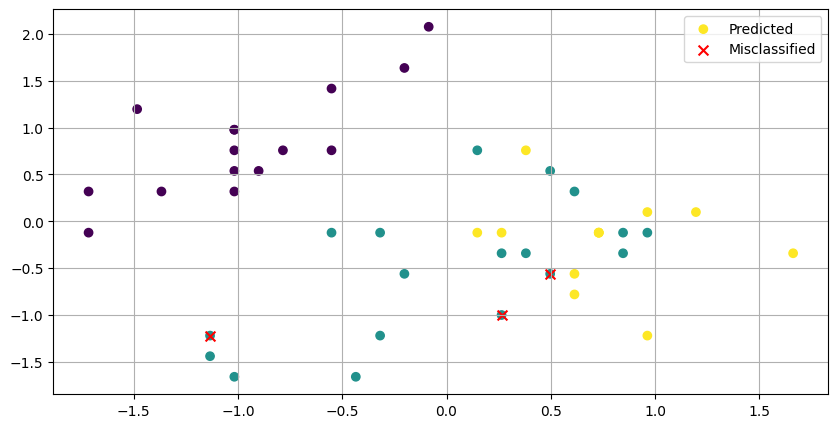

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(X_t_std[:, 0], X_t_std[:,1], c=y_ovo, cmap='viridis', marker='o', label='Predicted')
misclassified_indices = y_t != y_ovo
plt.scatter(X_t_std[misclassified_indices, 0], X_t_std[misclassified_indices, 1], c='red', marker='x', s=50, label='Misclassified')
plt.grid()
plt.legend()
plt.show()

In [122]:
print(f'Accuracy={accuracy_score(y_t, y_ovo)}')

Accuracy=0.9333333333333333


Подводя итог можно сказать следующее о этих двух стратегиях:
1. One-vs-Rest (OvR):
   - Также известный как "One-vs-All".
   - Для каждого класса создается один бинарный классификатор, который различает данный класс от всех остальных.
   - Если у вас есть K классов, то будет создано K бинарных классификаторов.
   - При классификации новых данных каждый классификатор предсказывает вероятность (или принадлежность) объекта к своему классу. Затем объект относится к классу с наивысшей предсказанной вероятностью.

2. One-vs-One (OvO):
   - Также известный как "All-vs-All".
   - Для каждой пары классов создается один бинарный классификатор, который различает эти два класса.
   - Если у вас есть K классов, то будет создано K(K-1)/2 бинарных классификаторов.
   - При классификации новых данных каждый классификатор проголосует за один из двух классов. Затем объект относится к классу, который набрал большинство голосов.

Сравнение:
- OvR подход проще в реализации, поскольку требует меньше бинарных классификаторов (K вместо K(K-1)/2).
- OvO может потребовать больше времени и вычислительных ресурсов, так как создает больше классификаторов. Однако, в случае SVM, OvO может быть предпочтительным, так как он более устойчив к несбалансированным данным.

